In [1]:
import numpy as np
import math
import torch
from torch import nn

import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
from livelossplot import PlotLosses
from Inference.GeNVI_predictive import GeNPredVI, GeNetEns

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
from Experiments.foong import Setup
setup=Setup(device, layerwidth=50)

# Target density #

In [4]:
logprior=setup.logprior
loglikelihood=setup.loglikelihood
projection=setup.projection

n_data_samples=setup.n_samples
param_count=setup.param_count
model=setup._model
print(n_data_samples)

200


# Generative Network #

In [32]:
activation = nn.Tanh()#nn.ReLU()
init_b = .001
lat_dim=10
GeN = GeNetEns(1, lat_dim, 50, param_count, activation, 0.2, init_b, device)

In [33]:
%matplotlib inline
from tempfile import TemporaryDirectory


k_MC=50

#sample, = ax.scatter([],[],color='red',alpha=0.07)
#fig.canvas.draw()
    
    
'''
def show(GeN,n,alpha=0.07):
    Z=GeN(n).detach().clone().cpu()
    plt.pcolormesh(grid_x.numpy(),grid_y.numpy(),p.exp().numpy())
    plt.scatter(Z[:,0],Z[:,1],color='red',alpha=alpha) 
    plt.draw()
    plt.show()
''' 

def show(GeN,n):
    #Z=GeN(200).detach()
    #fig=setup.makePlot(Z,device)
    #plt.show()
    return
    
#lr =.03 for lat_dim 5

with TemporaryDirectory() as temp_dir:
    optimizer = GeNPredVI(loglikelihood, logprior, projection, k_MC,
		                                    0, 100, 1000, 50, 50,
		                                    20000, .05, .000001, 100, .5,
		                                    device, True, temp_dir, save_best=True)
    best_epoch, scores=optimizer.run(GeN,show)
print(best_epoch,scores)

Epoch [0/20000], Loss: 74289.015625, Entropy -52.279266357421875, Learning Rate: 0.05
Epoch [1/20000], Loss: 346006.46875, Entropy -35.137535095214844, Learning Rate: 0.05
Epoch [2/20000], Loss: 209359.109375, Entropy -40.498565673828125, Learning Rate: 0.05
Epoch [3/20000], Loss: 125035.9765625, Entropy -47.538909912109375, Learning Rate: 0.05
Epoch [4/20000], Loss: 118667.21875, Entropy -40.988250732421875, Learning Rate: 0.05
Epoch [5/20000], Loss: 62404.08203125, Entropy -53.063446044921875, Learning Rate: 0.05
Epoch [6/20000], Loss: 59549.703125, Entropy -49.02690124511719, Learning Rate: 0.05
Epoch [7/20000], Loss: 58340.3046875, Entropy -51.60736083984375, Learning Rate: 0.05
Epoch [8/20000], Loss: 115744.9609375, Entropy -45.60926818847656, Learning Rate: 0.05
Epoch [9/20000], Loss: 91976.0234375, Entropy -48.77137756347656, Learning Rate: 0.05
Epoch [10/20000], Loss: 78708.671875, Entropy -54.82539367675781, Learning Rate: 0.05
Epoch [11/20000], Loss: 79600.546875, Entropy -56

Epoch [95/20000], Loss: 1290.9317626953125, Entropy -155.8031768798828, Learning Rate: 0.05
Epoch [96/20000], Loss: 1392.7635498046875, Entropy -156.18450927734375, Learning Rate: 0.05
Epoch [97/20000], Loss: 1328.598388671875, Entropy -157.40255737304688, Learning Rate: 0.05
Epoch [98/20000], Loss: 1380.2177734375, Entropy -153.36151123046875, Learning Rate: 0.05
Epoch [99/20000], Loss: 1303.64697265625, Entropy -159.37261962890625, Learning Rate: 0.05
Epoch [100/20000], Loss: 1289.088134765625, Entropy -157.3451690673828, Learning Rate: 0.05
Epoch [101/20000], Loss: 1373.51025390625, Entropy -155.26165771484375, Learning Rate: 0.05
Epoch [102/20000], Loss: 1201.5697021484375, Entropy -154.14996337890625, Learning Rate: 0.05
Epoch [103/20000], Loss: 1222.128173828125, Entropy -147.8337860107422, Learning Rate: 0.05
Epoch [104/20000], Loss: 1203.6102294921875, Entropy -149.72457885742188, Learning Rate: 0.05
Epoch [105/20000], Loss: 1141.5281982421875, Entropy -154.04299926757812, Lear

Epoch [188/20000], Loss: 978.1721801757812, Entropy -134.86244201660156, Learning Rate: 0.05
Epoch [189/20000], Loss: 747.7816162109375, Entropy -138.5319366455078, Learning Rate: 0.05
Epoch [190/20000], Loss: 894.5059204101562, Entropy -137.51783752441406, Learning Rate: 0.05
Epoch [191/20000], Loss: 852.1317749023438, Entropy -139.51156616210938, Learning Rate: 0.05
Epoch [192/20000], Loss: 906.3416748046875, Entropy -134.52195739746094, Learning Rate: 0.05
Epoch [193/20000], Loss: 769.6875, Entropy -135.779052734375, Learning Rate: 0.05
Epoch [194/20000], Loss: 715.0896606445312, Entropy -139.65057373046875, Learning Rate: 0.05
Epoch [195/20000], Loss: 766.0569458007812, Entropy -141.15829467773438, Learning Rate: 0.05
Epoch [196/20000], Loss: 841.2088623046875, Entropy -137.15057373046875, Learning Rate: 0.05
Epoch [197/20000], Loss: 748.9268188476562, Entropy -137.69114685058594, Learning Rate: 0.05
Epoch [198/20000], Loss: 578.1275024414062, Entropy -142.60504150390625, Learning 

Epoch [279/20000], Loss: 524.418701171875, Entropy -145.3040771484375, Learning Rate: 0.05
Epoch [280/20000], Loss: 398.6949462890625, Entropy -145.2215576171875, Learning Rate: 0.05
Epoch [281/20000], Loss: 469.88128662109375, Entropy -143.14071655273438, Learning Rate: 0.05
Epoch [282/20000], Loss: 492.63720703125, Entropy -141.19036865234375, Learning Rate: 0.05
Epoch [283/20000], Loss: 391.10809326171875, Entropy -137.80250549316406, Learning Rate: 0.05
Epoch [284/20000], Loss: 419.86041259765625, Entropy -138.34046936035156, Learning Rate: 0.05
Epoch [285/20000], Loss: 396.52056884765625, Entropy -143.3643341064453, Learning Rate: 0.05
Epoch [286/20000], Loss: 344.88470458984375, Entropy -142.37054443359375, Learning Rate: 0.05
Epoch [287/20000], Loss: 363.9884338378906, Entropy -138.6306610107422, Learning Rate: 0.05
Epoch [288/20000], Loss: 433.85369873046875, Entropy -147.95648193359375, Learning Rate: 0.05
Epoch [289/20000], Loss: 318.61309814453125, Entropy -149.3738098144531

Epoch [368/20000], Loss: 381.7768249511719, Entropy -145.88003540039062, Learning Rate: 0.05
Epoch [369/20000], Loss: 292.92742919921875, Entropy -142.49378967285156, Learning Rate: 0.05
Epoch [370/20000], Loss: 218.18350219726562, Entropy -145.04550170898438, Learning Rate: 0.05
Epoch [371/20000], Loss: 264.1534118652344, Entropy -143.8125762939453, Learning Rate: 0.05
Epoch [372/20000], Loss: 176.73638916015625, Entropy -144.3529815673828, Learning Rate: 0.05
Epoch [373/20000], Loss: 292.6562194824219, Entropy -147.621337890625, Learning Rate: 0.05
Epoch [374/20000], Loss: 178.402099609375, Entropy -147.46372985839844, Learning Rate: 0.05
Epoch [375/20000], Loss: 391.213134765625, Entropy -151.12091064453125, Learning Rate: 0.05
Epoch [376/20000], Loss: 442.0967102050781, Entropy -143.54283142089844, Learning Rate: 0.05
Epoch [377/20000], Loss: 248.28346252441406, Entropy -150.86985778808594, Learning Rate: 0.05
Epoch [378/20000], Loss: 326.50140380859375, Entropy -147.09872436523438

Epoch [460/20000], Loss: 309.4400329589844, Entropy -149.00039672851562, Learning Rate: 0.05
Epoch [461/20000], Loss: 286.0379943847656, Entropy -150.56439208984375, Learning Rate: 0.05
Epoch [462/20000], Loss: 281.32470703125, Entropy -143.35299682617188, Learning Rate: 0.05
Epoch [463/20000], Loss: 279.8868103027344, Entropy -147.4380645751953, Learning Rate: 0.05
Epoch [464/20000], Loss: 455.2372131347656, Entropy -145.31494140625, Learning Rate: 0.05
Epoch [465/20000], Loss: 358.9681701660156, Entropy -149.83807373046875, Learning Rate: 0.05
Epoch [466/20000], Loss: 188.7435760498047, Entropy -149.8894805908203, Learning Rate: 0.05
Epoch [467/20000], Loss: 244.33370971679688, Entropy -147.33058166503906, Learning Rate: 0.05
Epoch [468/20000], Loss: 145.24951171875, Entropy -151.7554931640625, Learning Rate: 0.05
Epoch [469/20000], Loss: 211.2279052734375, Entropy -152.91598510742188, Learning Rate: 0.05
Epoch [470/20000], Loss: 177.76214599609375, Entropy -146.46817016601562, Learn

Epoch [549/20000], Loss: 112.46832275390625, Entropy -150.832763671875, Learning Rate: 0.025
Epoch [550/20000], Loss: 124.29501342773438, Entropy -157.08831787109375, Learning Rate: 0.025
Epoch [551/20000], Loss: 108.83503723144531, Entropy -153.4418487548828, Learning Rate: 0.025
Epoch [552/20000], Loss: 106.04812622070312, Entropy -156.78961181640625, Learning Rate: 0.025
Epoch [553/20000], Loss: 104.31330871582031, Entropy -156.9276123046875, Learning Rate: 0.025
Epoch [554/20000], Loss: 101.47544860839844, Entropy -154.58702087402344, Learning Rate: 0.025
Epoch [555/20000], Loss: 113.09292602539062, Entropy -153.6149139404297, Learning Rate: 0.025
Epoch [556/20000], Loss: 112.68653869628906, Entropy -156.5377655029297, Learning Rate: 0.025
Epoch [557/20000], Loss: 112.91273498535156, Entropy -151.96429443359375, Learning Rate: 0.025
Epoch [558/20000], Loss: 110.02993774414062, Entropy -152.35733032226562, Learning Rate: 0.025
Epoch [559/20000], Loss: 128.67721557617188, Entropy -15

Epoch [636/20000], Loss: 92.35432434082031, Entropy -142.14273071289062, Learning Rate: 0.025
Epoch [637/20000], Loss: 97.15156555175781, Entropy -157.09365844726562, Learning Rate: 0.025
Epoch [638/20000], Loss: 93.25605773925781, Entropy -153.19712829589844, Learning Rate: 0.025
Epoch [639/20000], Loss: 113.37579345703125, Entropy -156.49456787109375, Learning Rate: 0.025
Epoch [640/20000], Loss: 98.76907348632812, Entropy -147.06051635742188, Learning Rate: 0.025
Epoch [641/20000], Loss: 107.13543701171875, Entropy -149.9196319580078, Learning Rate: 0.025
Epoch [642/20000], Loss: 97.51898193359375, Entropy -144.44529724121094, Learning Rate: 0.025
Epoch [643/20000], Loss: 98.42411804199219, Entropy -153.5175018310547, Learning Rate: 0.025
Epoch [644/20000], Loss: 88.53764343261719, Entropy -154.674072265625, Learning Rate: 0.025
Epoch [645/20000], Loss: 91.91603088378906, Entropy -147.98037719726562, Learning Rate: 0.025
Epoch [646/20000], Loss: 101.15664672851562, Entropy -150.1682

Epoch [726/20000], Loss: 90.43165588378906, Entropy -156.16326904296875, Learning Rate: 0.025
Epoch [727/20000], Loss: 82.21136474609375, Entropy -144.2541961669922, Learning Rate: 0.025
Epoch [728/20000], Loss: 84.20756530761719, Entropy -148.35641479492188, Learning Rate: 0.025
Epoch [729/20000], Loss: 90.707275390625, Entropy -153.08749389648438, Learning Rate: 0.025
Epoch [730/20000], Loss: 87.85379028320312, Entropy -143.17626953125, Learning Rate: 0.025
Epoch [731/20000], Loss: 80.26432800292969, Entropy -142.19210815429688, Learning Rate: 0.025
Epoch [732/20000], Loss: 84.24691772460938, Entropy -149.4571533203125, Learning Rate: 0.025
Epoch [733/20000], Loss: 79.27484130859375, Entropy -151.04689025878906, Learning Rate: 0.025
Epoch [734/20000], Loss: 87.65193176269531, Entropy -148.47564697265625, Learning Rate: 0.025
Epoch [735/20000], Loss: 76.22531127929688, Entropy -145.74688720703125, Learning Rate: 0.025
Epoch [736/20000], Loss: 86.63931274414062, Entropy -146.8133087158

Epoch [815/20000], Loss: 90.96525573730469, Entropy -143.48670959472656, Learning Rate: 0.025
Epoch [816/20000], Loss: 74.61785888671875, Entropy -146.62916564941406, Learning Rate: 0.025
Epoch [817/20000], Loss: 82.78691101074219, Entropy -142.16009521484375, Learning Rate: 0.025
Epoch [818/20000], Loss: 80.90684509277344, Entropy -140.74676513671875, Learning Rate: 0.025
Epoch [819/20000], Loss: 75.20849609375, Entropy -144.2501983642578, Learning Rate: 0.025
Epoch [820/20000], Loss: 83.80618286132812, Entropy -147.70761108398438, Learning Rate: 0.025
Epoch [821/20000], Loss: 74.41958618164062, Entropy -139.83448791503906, Learning Rate: 0.025
Epoch [822/20000], Loss: 90.4500732421875, Entropy -146.7808074951172, Learning Rate: 0.025
Epoch [823/20000], Loss: 79.71589660644531, Entropy -147.59304809570312, Learning Rate: 0.025
Epoch [824/20000], Loss: 82.27789306640625, Entropy -141.1130828857422, Learning Rate: 0.025
Epoch [825/20000], Loss: 79.53121948242188, Entropy -141.5814971923

Epoch [907/20000], Loss: 96.52684783935547, Entropy -136.15609741210938, Learning Rate: 0.025
Epoch [908/20000], Loss: 81.4527587890625, Entropy -140.67910766601562, Learning Rate: 0.025
Epoch [909/20000], Loss: 86.62944030761719, Entropy -138.0053253173828, Learning Rate: 0.025
Epoch [910/20000], Loss: 96.23018646240234, Entropy -130.80245971679688, Learning Rate: 0.025
Epoch [911/20000], Loss: 82.00460815429688, Entropy -138.96676635742188, Learning Rate: 0.025
Epoch [912/20000], Loss: 91.90414428710938, Entropy -141.63409423828125, Learning Rate: 0.025
Epoch [913/20000], Loss: 110.39891815185547, Entropy -139.9541015625, Learning Rate: 0.025
Epoch [914/20000], Loss: 82.15672302246094, Entropy -136.8503875732422, Learning Rate: 0.025
Epoch [915/20000], Loss: 102.84001922607422, Entropy -148.31222534179688, Learning Rate: 0.025
Epoch [916/20000], Loss: 77.34918212890625, Entropy -139.07945251464844, Learning Rate: 0.025
Epoch [917/20000], Loss: 67.314453125, Entropy -131.4020233154297

Epoch [995/20000], Loss: 65.17057800292969, Entropy -145.39447021484375, Learning Rate: 0.0125
Epoch [996/20000], Loss: 64.35328674316406, Entropy -143.3589324951172, Learning Rate: 0.0125
Epoch [997/20000], Loss: 67.45317077636719, Entropy -141.16256713867188, Learning Rate: 0.0125
Epoch [998/20000], Loss: 66.00595092773438, Entropy -136.3843994140625, Learning Rate: 0.0125
Epoch [999/20000], Loss: 63.740631103515625, Entropy -137.28500366210938, Learning Rate: 0.0125
Epoch [1000/20000], Loss: 65.96388244628906, Entropy -145.4290313720703, Learning Rate: 0.0125
Epoch [1001/20000], Loss: 59.85597229003906, Entropy -143.6213836669922, Learning Rate: 0.0125
Epoch [1002/20000], Loss: 71.50181579589844, Entropy -147.9959716796875, Learning Rate: 0.0125
Epoch [1003/20000], Loss: 58.22148132324219, Entropy -136.061279296875, Learning Rate: 0.0125
Epoch [1004/20000], Loss: 72.88134765625, Entropy -142.69015502929688, Learning Rate: 0.0125
Epoch [1005/20000], Loss: 57.96076965332031, Entropy -

Epoch [1084/20000], Loss: 64.9564208984375, Entropy -141.9733123779297, Learning Rate: 0.0125
Epoch [1085/20000], Loss: 49.04286193847656, Entropy -138.7308807373047, Learning Rate: 0.0125
Epoch [1086/20000], Loss: 53.10313415527344, Entropy -132.94229125976562, Learning Rate: 0.0125
Epoch [1087/20000], Loss: 61.01350402832031, Entropy -136.2157745361328, Learning Rate: 0.0125
Epoch [1088/20000], Loss: 51.45567321777344, Entropy -137.04766845703125, Learning Rate: 0.0125
Epoch [1089/20000], Loss: 55.30867004394531, Entropy -136.34713745117188, Learning Rate: 0.0125
Epoch [1090/20000], Loss: 58.3370361328125, Entropy -138.1370086669922, Learning Rate: 0.0125
Epoch [1091/20000], Loss: 49.809356689453125, Entropy -131.26409912109375, Learning Rate: 0.0125
Epoch [1092/20000], Loss: 46.2772216796875, Entropy -130.58558654785156, Learning Rate: 0.0125
Epoch [1093/20000], Loss: 44.76081848144531, Entropy -132.73825073242188, Learning Rate: 0.0125
Epoch [1094/20000], Loss: 53.7001953125, Entro

Epoch [1173/20000], Loss: 50.441253662109375, Entropy -132.69711303710938, Learning Rate: 0.0125
Epoch [1174/20000], Loss: 46.35661315917969, Entropy -130.25677490234375, Learning Rate: 0.0125
Epoch [1175/20000], Loss: 52.556243896484375, Entropy -140.70840454101562, Learning Rate: 0.0125
Epoch [1176/20000], Loss: 47.91619873046875, Entropy -132.097412109375, Learning Rate: 0.0125
Epoch [1177/20000], Loss: 50.52949523925781, Entropy -126.61906433105469, Learning Rate: 0.0125
Epoch [1178/20000], Loss: 64.04594421386719, Entropy -135.10702514648438, Learning Rate: 0.0125
Epoch [1179/20000], Loss: 59.19036865234375, Entropy -137.22349548339844, Learning Rate: 0.0125
Epoch [1180/20000], Loss: 49.59275817871094, Entropy -127.23989868164062, Learning Rate: 0.0125
Epoch [1181/20000], Loss: 53.36543273925781, Entropy -137.3912353515625, Learning Rate: 0.0125
Epoch [1182/20000], Loss: 55.88987731933594, Entropy -135.12646484375, Learning Rate: 0.0125
Epoch [1183/20000], Loss: 57.72554016113281,

Epoch [1259/20000], Loss: 47.06221008300781, Entropy -125.88406372070312, Learning Rate: 0.0125
Epoch [1260/20000], Loss: 51.238555908203125, Entropy -129.50067138671875, Learning Rate: 0.0125
Epoch [1261/20000], Loss: 56.465911865234375, Entropy -133.6646728515625, Learning Rate: 0.0125
Epoch [1262/20000], Loss: 51.08296203613281, Entropy -130.93447875976562, Learning Rate: 0.0125
Epoch [1263/20000], Loss: 51.208251953125, Entropy -132.587890625, Learning Rate: 0.0125
Epoch [1264/20000], Loss: 49.471954345703125, Entropy -132.26083374023438, Learning Rate: 0.0125
Epoch [1265/20000], Loss: 48.08451843261719, Entropy -128.50192260742188, Learning Rate: 0.0125
Epoch [1266/20000], Loss: 50.3516845703125, Entropy -131.45303344726562, Learning Rate: 0.0125
Epoch [1267/20000], Loss: 52.337677001953125, Entropy -135.21127319335938, Learning Rate: 0.0125
Epoch [1268/20000], Loss: 43.67250061035156, Entropy -125.5246353149414, Learning Rate: 0.0125
Epoch [1269/20000], Loss: 49.42494201660156, E

Epoch [1349/20000], Loss: 43.7803955078125, Entropy -136.37852478027344, Learning Rate: 0.00625
Epoch [1350/20000], Loss: 51.3148193359375, Entropy -138.54710388183594, Learning Rate: 0.00625
Epoch [1351/20000], Loss: 47.485260009765625, Entropy -125.66519165039062, Learning Rate: 0.00625
Epoch [1352/20000], Loss: 43.59257507324219, Entropy -134.303466796875, Learning Rate: 0.00625
Epoch [1353/20000], Loss: 41.33941650390625, Entropy -127.83582305908203, Learning Rate: 0.00625
Epoch [1354/20000], Loss: 37.770294189453125, Entropy -127.74005889892578, Learning Rate: 0.00625
Epoch [1355/20000], Loss: 42.164398193359375, Entropy -132.7207794189453, Learning Rate: 0.00625
Epoch [1356/20000], Loss: 41.44476318359375, Entropy -130.70716857910156, Learning Rate: 0.00625
Epoch [1357/20000], Loss: 47.94169616699219, Entropy -137.03146362304688, Learning Rate: 0.00625
Epoch [1358/20000], Loss: 37.93199157714844, Entropy -128.28684997558594, Learning Rate: 0.00625
Epoch [1359/20000], Loss: 37.275

Epoch [1436/20000], Loss: 38.72090148925781, Entropy -128.43577575683594, Learning Rate: 0.00625
Epoch [1437/20000], Loss: 37.83522033691406, Entropy -125.1518783569336, Learning Rate: 0.00625
Epoch [1438/20000], Loss: 57.09526062011719, Entropy -141.28846740722656, Learning Rate: 0.00625
Epoch [1439/20000], Loss: 43.19866943359375, Entropy -133.0216064453125, Learning Rate: 0.00625
Epoch [1440/20000], Loss: 42.11143493652344, Entropy -133.61300659179688, Learning Rate: 0.00625
Epoch [1441/20000], Loss: 29.83428955078125, Entropy -122.38249969482422, Learning Rate: 0.00625
Epoch [1442/20000], Loss: 40.04823303222656, Entropy -134.42568969726562, Learning Rate: 0.00625
Epoch [1443/20000], Loss: 41.00218200683594, Entropy -133.68470764160156, Learning Rate: 0.00625
Epoch [1444/20000], Loss: 38.02864074707031, Entropy -132.61087036132812, Learning Rate: 0.00625
Epoch [1445/20000], Loss: 36.963623046875, Entropy -127.73238372802734, Learning Rate: 0.00625
Epoch [1446/20000], Loss: 35.68704

Epoch [1523/20000], Loss: 29.646530151367188, Entropy -122.87541198730469, Learning Rate: 0.00625
Epoch [1524/20000], Loss: 31.320327758789062, Entropy -127.07256317138672, Learning Rate: 0.00625
Epoch [1525/20000], Loss: 42.3846435546875, Entropy -128.62850952148438, Learning Rate: 0.00625
Epoch [1526/20000], Loss: 37.02203369140625, Entropy -124.14869689941406, Learning Rate: 0.00625
Epoch [1527/20000], Loss: 35.83473205566406, Entropy -128.1251220703125, Learning Rate: 0.00625
Epoch [1528/20000], Loss: 36.8028564453125, Entropy -128.42352294921875, Learning Rate: 0.00625
Epoch [1529/20000], Loss: 53.52503967285156, Entropy -136.0877227783203, Learning Rate: 0.00625
Epoch [1530/20000], Loss: 33.813751220703125, Entropy -124.38627624511719, Learning Rate: 0.00625
Epoch [1531/20000], Loss: 49.76397705078125, Entropy -144.55538940429688, Learning Rate: 0.00625
Epoch [1532/20000], Loss: 43.46894836425781, Entropy -131.52064514160156, Learning Rate: 0.00625
Epoch [1533/20000], Loss: 45.85

Epoch [1611/20000], Loss: 34.2506103515625, Entropy -129.55308532714844, Learning Rate: 0.00625
Epoch [1612/20000], Loss: 36.68501281738281, Entropy -134.43702697753906, Learning Rate: 0.00625
Epoch [1613/20000], Loss: 36.62811279296875, Entropy -127.3005599975586, Learning Rate: 0.00625
Epoch [1614/20000], Loss: 37.1796875, Entropy -130.61643981933594, Learning Rate: 0.00625
Epoch [1615/20000], Loss: 30.794174194335938, Entropy -128.61749267578125, Learning Rate: 0.00625
Epoch [1616/20000], Loss: 39.94769287109375, Entropy -130.10208129882812, Learning Rate: 0.00625
Epoch [1617/20000], Loss: 32.53956604003906, Entropy -125.81006622314453, Learning Rate: 0.00625
Epoch [1618/20000], Loss: 43.174652099609375, Entropy -133.72694396972656, Learning Rate: 0.00625
Epoch [1619/20000], Loss: 39.04530334472656, Entropy -130.3782501220703, Learning Rate: 0.00625
Epoch [1620/20000], Loss: 34.06187438964844, Entropy -124.64274597167969, Learning Rate: 0.00625
Epoch [1621/20000], Loss: 38.400039672

Epoch [1697/20000], Loss: 38.3746337890625, Entropy -123.21488189697266, Learning Rate: 0.003125
Epoch [1698/20000], Loss: 39.500396728515625, Entropy -135.80235290527344, Learning Rate: 0.003125
Epoch [1699/20000], Loss: 32.40861511230469, Entropy -127.59757995605469, Learning Rate: 0.003125
Epoch [1700/20000], Loss: 33.27879333496094, Entropy -128.44410705566406, Learning Rate: 0.003125
Epoch [1701/20000], Loss: 31.180511474609375, Entropy -126.58949279785156, Learning Rate: 0.003125
Epoch [1702/20000], Loss: 31.4595947265625, Entropy -130.33038330078125, Learning Rate: 0.003125
Epoch [1703/20000], Loss: 30.192718505859375, Entropy -124.00340270996094, Learning Rate: 0.003125
Epoch [1704/20000], Loss: 30.330215454101562, Entropy -124.745849609375, Learning Rate: 0.003125
Epoch [1705/20000], Loss: 33.17730712890625, Entropy -130.53538513183594, Learning Rate: 0.003125
Epoch [1706/20000], Loss: 33.33183288574219, Entropy -128.68270874023438, Learning Rate: 0.003125
Epoch [1707/20000], 

Epoch [1784/20000], Loss: 29.460128784179688, Entropy -124.64120483398438, Learning Rate: 0.003125
Epoch [1785/20000], Loss: 28.730545043945312, Entropy -122.47748565673828, Learning Rate: 0.003125
Epoch [1786/20000], Loss: 27.228240966796875, Entropy -127.50239562988281, Learning Rate: 0.003125
Epoch [1787/20000], Loss: 29.915191650390625, Entropy -126.48152923583984, Learning Rate: 0.003125
Epoch [1788/20000], Loss: 32.78138732910156, Entropy -129.44606018066406, Learning Rate: 0.003125
Epoch [1789/20000], Loss: 32.57218933105469, Entropy -121.6845474243164, Learning Rate: 0.003125
Epoch [1790/20000], Loss: 39.412994384765625, Entropy -129.96475219726562, Learning Rate: 0.003125
Epoch [1791/20000], Loss: 29.100051879882812, Entropy -127.7059555053711, Learning Rate: 0.003125
Epoch [1792/20000], Loss: 28.7197265625, Entropy -120.23112487792969, Learning Rate: 0.003125
Epoch [1793/20000], Loss: 37.91722106933594, Entropy -132.1121063232422, Learning Rate: 0.003125
Epoch [1794/20000], L

Epoch [1871/20000], Loss: 31.586334228515625, Entropy -129.5160369873047, Learning Rate: 0.003125
Epoch [1872/20000], Loss: 33.72682189941406, Entropy -123.45257568359375, Learning Rate: 0.003125
Epoch [1873/20000], Loss: 29.985748291015625, Entropy -125.56298065185547, Learning Rate: 0.003125
Epoch [1874/20000], Loss: 27.906753540039062, Entropy -127.23540496826172, Learning Rate: 0.003125
Epoch [1875/20000], Loss: 24.911087036132812, Entropy -123.85566711425781, Learning Rate: 0.003125
Epoch [1876/20000], Loss: 34.98722839355469, Entropy -138.44044494628906, Learning Rate: 0.003125
Epoch [1877/20000], Loss: 44.23944091796875, Entropy -130.88323974609375, Learning Rate: 0.003125
Epoch [1878/20000], Loss: 30.411849975585938, Entropy -130.68597412109375, Learning Rate: 0.003125
Epoch [1879/20000], Loss: 28.213653564453125, Entropy -123.6613540649414, Learning Rate: 0.003125
Epoch [1880/20000], Loss: 30.9071044921875, Entropy -125.89030456542969, Learning Rate: 0.003125
Epoch [1881/20000

Epoch [1957/20000], Loss: 31.636383056640625, Entropy -126.3259506225586, Learning Rate: 0.003125
Epoch [1958/20000], Loss: 28.274017333984375, Entropy -123.04996490478516, Learning Rate: 0.003125
Epoch [1959/20000], Loss: 29.53411865234375, Entropy -129.4761505126953, Learning Rate: 0.003125
Epoch [1960/20000], Loss: 27.56103515625, Entropy -127.52085876464844, Learning Rate: 0.003125
Epoch [1961/20000], Loss: 37.8360595703125, Entropy -133.23561096191406, Learning Rate: 0.003125
Epoch [1962/20000], Loss: 37.998779296875, Entropy -128.5371856689453, Learning Rate: 0.003125
Epoch [1963/20000], Loss: 31.128875732421875, Entropy -130.8577880859375, Learning Rate: 0.003125
Epoch [1964/20000], Loss: 28.349517822265625, Entropy -124.33052062988281, Learning Rate: 0.003125
Epoch [1965/20000], Loss: 23.014739990234375, Entropy -120.883056640625, Learning Rate: 0.003125
Epoch [1966/20000], Loss: 32.522613525390625, Entropy -125.2770004272461, Learning Rate: 0.003125
Epoch [1967/20000], Loss: 3

Epoch [2041/20000], Loss: 25.5439453125, Entropy -124.19924926757812, Learning Rate: 0.0015625
Epoch [2042/20000], Loss: 29.281417846679688, Entropy -128.80758666992188, Learning Rate: 0.0015625
Epoch [2043/20000], Loss: 22.763214111328125, Entropy -122.84001922607422, Learning Rate: 0.0015625
Epoch [2044/20000], Loss: 31.582427978515625, Entropy -125.6556167602539, Learning Rate: 0.0015625
Epoch [2045/20000], Loss: 30.687088012695312, Entropy -130.4962158203125, Learning Rate: 0.0015625
Epoch [2046/20000], Loss: 33.7135009765625, Entropy -131.0478515625, Learning Rate: 0.0015625
Epoch [2047/20000], Loss: 24.102737426757812, Entropy -122.7177734375, Learning Rate: 0.0015625
Epoch [2048/20000], Loss: 27.294692993164062, Entropy -124.95611572265625, Learning Rate: 0.0015625
Epoch [2049/20000], Loss: 32.17333984375, Entropy -131.65621948242188, Learning Rate: 0.0015625
Epoch [2050/20000], Loss: 20.878173828125, Entropy -120.60188293457031, Learning Rate: 0.0015625
Epoch [2051/20000], Loss

Epoch [2124/20000], Loss: 32.84458923339844, Entropy -132.5546875, Learning Rate: 0.00078125
Epoch [2125/20000], Loss: 32.96974182128906, Entropy -132.96990966796875, Learning Rate: 0.00078125
Epoch [2126/20000], Loss: 32.471282958984375, Entropy -130.97511291503906, Learning Rate: 0.00078125
Epoch [2127/20000], Loss: 29.072555541992188, Entropy -128.5699005126953, Learning Rate: 0.00078125
Epoch [2128/20000], Loss: 28.079452514648438, Entropy -123.8698959350586, Learning Rate: 0.00078125
Epoch [2129/20000], Loss: 29.721405029296875, Entropy -127.41793823242188, Learning Rate: 0.00078125
Epoch [2130/20000], Loss: 24.778656005859375, Entropy -117.14371490478516, Learning Rate: 0.00078125
Epoch [2131/20000], Loss: 28.416305541992188, Entropy -127.23455810546875, Learning Rate: 0.00078125
Epoch [2132/20000], Loss: 33.89031982421875, Entropy -129.41726684570312, Learning Rate: 0.00078125
Epoch [2133/20000], Loss: 32.36968994140625, Entropy -127.49419403076172, Learning Rate: 0.00078125
Epo

Epoch [2209/20000], Loss: 23.904251098632812, Entropy -120.56038665771484, Learning Rate: 0.00078125
Epoch [2210/20000], Loss: 31.597732543945312, Entropy -130.2972412109375, Learning Rate: 0.00078125
Epoch [2211/20000], Loss: 30.024505615234375, Entropy -127.42161560058594, Learning Rate: 0.00078125
Epoch [2212/20000], Loss: 31.6014404296875, Entropy -128.9400177001953, Learning Rate: 0.00078125
Epoch [2213/20000], Loss: 23.019210815429688, Entropy -124.57080841064453, Learning Rate: 0.00078125
Epoch [2214/20000], Loss: 21.122955322265625, Entropy -121.12625122070312, Learning Rate: 0.00078125
Epoch [2215/20000], Loss: 25.994491577148438, Entropy -124.3425064086914, Learning Rate: 0.00078125
Epoch [2216/20000], Loss: 28.19384765625, Entropy -123.34330749511719, Learning Rate: 0.00078125
Epoch [2217/20000], Loss: 22.459991455078125, Entropy -121.79383087158203, Learning Rate: 0.00078125
Epoch [2218/20000], Loss: 28.686172485351562, Entropy -120.7599868774414, Learning Rate: 0.00078125


Epoch [2293/20000], Loss: 22.739486694335938, Entropy -119.20219421386719, Learning Rate: 0.000390625
Epoch [2294/20000], Loss: 23.74945068359375, Entropy -125.78850555419922, Learning Rate: 0.000390625
Epoch [2295/20000], Loss: 36.51539611816406, Entropy -132.58828735351562, Learning Rate: 0.000390625
Epoch [2296/20000], Loss: 34.71955871582031, Entropy -134.13331604003906, Learning Rate: 0.000390625
Epoch [2297/20000], Loss: 19.939178466796875, Entropy -120.34320831298828, Learning Rate: 0.000390625
Epoch [2298/20000], Loss: 25.2979736328125, Entropy -126.0932388305664, Learning Rate: 0.000390625
Epoch [2299/20000], Loss: 31.200531005859375, Entropy -126.16140747070312, Learning Rate: 0.000390625
Epoch [2300/20000], Loss: 24.876419067382812, Entropy -127.18233489990234, Learning Rate: 0.000390625
Epoch [2301/20000], Loss: 36.33106994628906, Entropy -134.52230834960938, Learning Rate: 0.000390625
Epoch [2302/20000], Loss: 35.27760314941406, Entropy -124.40985107421875, Learning Rate: 

Epoch [2374/20000], Loss: 35.1065673828125, Entropy -128.99087524414062, Learning Rate: 0.0001953125
Epoch [2375/20000], Loss: 30.892486572265625, Entropy -124.35863494873047, Learning Rate: 0.0001953125
Epoch [2376/20000], Loss: 26.620697021484375, Entropy -124.57855224609375, Learning Rate: 0.0001953125
Epoch [2377/20000], Loss: 20.093658447265625, Entropy -124.34440612792969, Learning Rate: 0.0001953125
Epoch [2378/20000], Loss: 27.796340942382812, Entropy -122.23562622070312, Learning Rate: 0.0001953125
Epoch [2379/20000], Loss: 24.869735717773438, Entropy -124.7513427734375, Learning Rate: 0.0001953125
Epoch [2380/20000], Loss: 30.319427490234375, Entropy -126.48442077636719, Learning Rate: 0.0001953125
Epoch [2381/20000], Loss: 30.368865966796875, Entropy -118.65023803710938, Learning Rate: 0.0001953125
Epoch [2382/20000], Loss: 28.373947143554688, Entropy -123.92139434814453, Learning Rate: 0.0001953125
Epoch [2383/20000], Loss: 33.35816955566406, Entropy -133.93190002441406, Le

Epoch [2456/20000], Loss: 21.739456176757812, Entropy -124.59019470214844, Learning Rate: 9.765625e-05
Epoch [2457/20000], Loss: 27.929580688476562, Entropy -125.88019561767578, Learning Rate: 9.765625e-05
Epoch [2458/20000], Loss: 24.282608032226562, Entropy -124.11880493164062, Learning Rate: 9.765625e-05
Epoch [2459/20000], Loss: 21.060806274414062, Entropy -119.91077423095703, Learning Rate: 9.765625e-05
Epoch [2460/20000], Loss: 27.006851196289062, Entropy -129.8693084716797, Learning Rate: 9.765625e-05
Epoch [2461/20000], Loss: 23.429092407226562, Entropy -126.88741302490234, Learning Rate: 9.765625e-05
Epoch [2462/20000], Loss: 30.71502685546875, Entropy -122.91488647460938, Learning Rate: 9.765625e-05
Epoch [2463/20000], Loss: 26.587921142578125, Entropy -125.2330093383789, Learning Rate: 9.765625e-05
Epoch [2464/20000], Loss: 27.505386352539062, Entropy -124.42430114746094, Learning Rate: 9.765625e-05
Epoch [2465/20000], Loss: 26.339141845703125, Entropy -123.173828125, Learni

Epoch [2540/20000], Loss: 27.844223022460938, Entropy -127.64261627197266, Learning Rate: 9.765625e-05
Epoch [2541/20000], Loss: 32.637420654296875, Entropy -128.9764862060547, Learning Rate: 9.765625e-05
Epoch [2542/20000], Loss: 23.075958251953125, Entropy -118.8375015258789, Learning Rate: 9.765625e-05
Epoch [2543/20000], Loss: 25.65704345703125, Entropy -128.3621826171875, Learning Rate: 9.765625e-05
Epoch [2544/20000], Loss: 27.810821533203125, Entropy -126.56568145751953, Learning Rate: 9.765625e-05
Epoch [2545/20000], Loss: 34.25714111328125, Entropy -132.26516723632812, Learning Rate: 9.765625e-05
Epoch [2546/20000], Loss: 33.84303283691406, Entropy -123.83679962158203, Learning Rate: 9.765625e-05
Epoch [2547/20000], Loss: 26.600265502929688, Entropy -126.4852294921875, Learning Rate: 9.765625e-05
Epoch [2548/20000], Loss: 30.978591918945312, Entropy -125.2957763671875, Learning Rate: 9.765625e-05
Epoch [2549/20000], Loss: 27.245254516601562, Entropy -121.5797348022461, Learnin

Epoch [2623/20000], Loss: 26.566604614257812, Entropy -127.5836181640625, Learning Rate: 4.8828125e-05
Epoch [2624/20000], Loss: 27.961898803710938, Entropy -127.48119354248047, Learning Rate: 4.8828125e-05
Epoch [2625/20000], Loss: 24.453384399414062, Entropy -121.5812759399414, Learning Rate: 4.8828125e-05
Epoch [2626/20000], Loss: 31.140869140625, Entropy -127.80375671386719, Learning Rate: 4.8828125e-05
Epoch [2627/20000], Loss: 21.563339233398438, Entropy -123.75100708007812, Learning Rate: 4.8828125e-05
Epoch [2628/20000], Loss: 30.607757568359375, Entropy -125.7360610961914, Learning Rate: 4.8828125e-05
Epoch [2629/20000], Loss: 21.39422607421875, Entropy -120.10125732421875, Learning Rate: 4.8828125e-05
Epoch [2630/20000], Loss: 18.834152221679688, Entropy -117.37760925292969, Learning Rate: 4.8828125e-05
Epoch [2631/20000], Loss: 26.877151489257812, Entropy -118.76753997802734, Learning Rate: 4.8828125e-05
Epoch [2632/20000], Loss: 30.097015380859375, Entropy -125.364013671875

Epoch [2704/20000], Loss: 34.89329528808594, Entropy -135.62847900390625, Learning Rate: 2.44140625e-05
Epoch [2705/20000], Loss: 34.58404541015625, Entropy -128.45230102539062, Learning Rate: 2.44140625e-05
Epoch [2706/20000], Loss: 25.272491455078125, Entropy -123.57071685791016, Learning Rate: 2.44140625e-05
Epoch [2707/20000], Loss: 26.55767822265625, Entropy -125.07213592529297, Learning Rate: 2.44140625e-05
Epoch [2708/20000], Loss: 15.897109985351562, Entropy -112.96243286132812, Learning Rate: 2.44140625e-05
Epoch [2709/20000], Loss: 29.705841064453125, Entropy -129.29644775390625, Learning Rate: 2.44140625e-05
Epoch [2710/20000], Loss: 24.7913818359375, Entropy -120.59535217285156, Learning Rate: 2.44140625e-05
Epoch [2711/20000], Loss: 32.46791076660156, Entropy -134.4666748046875, Learning Rate: 2.44140625e-05
Epoch [2712/20000], Loss: 30.088485717773438, Entropy -132.18505859375, Learning Rate: 2.44140625e-05
Epoch [2713/20000], Loss: 29.951446533203125, Entropy -125.150802

Epoch [2784/20000], Loss: 26.35302734375, Entropy -129.67242431640625, Learning Rate: 1.220703125e-05
Epoch [2785/20000], Loss: 30.3681640625, Entropy -127.03085327148438, Learning Rate: 1.220703125e-05
Epoch [2786/20000], Loss: 27.9810791015625, Entropy -124.15160369873047, Learning Rate: 1.220703125e-05
Epoch [2787/20000], Loss: 19.642166137695312, Entropy -121.87644958496094, Learning Rate: 1.220703125e-05
Epoch [2788/20000], Loss: 34.073150634765625, Entropy -138.73660278320312, Learning Rate: 1.220703125e-05
Epoch [2789/20000], Loss: 23.492767333984375, Entropy -124.892822265625, Learning Rate: 1.220703125e-05
Epoch [2790/20000], Loss: 21.297164916992188, Entropy -116.41958618164062, Learning Rate: 1.220703125e-05
Epoch [2791/20000], Loss: 31.166519165039062, Entropy -125.92573547363281, Learning Rate: 1.220703125e-05
Epoch [2792/20000], Loss: 20.304092407226562, Entropy -121.78173828125, Learning Rate: 1.220703125e-05
Epoch [2793/20000], Loss: 29.687408447265625, Entropy -126.098

Epoch [2864/20000], Loss: 27.3477783203125, Entropy -122.91736602783203, Learning Rate: 6.103515625e-06
Epoch [2865/20000], Loss: 28.645736694335938, Entropy -127.3916015625, Learning Rate: 6.103515625e-06
Epoch [2866/20000], Loss: 29.615188598632812, Entropy -129.08773803710938, Learning Rate: 6.103515625e-06
Epoch [2867/20000], Loss: 21.911300659179688, Entropy -121.9872817993164, Learning Rate: 6.103515625e-06
Epoch [2868/20000], Loss: 29.906784057617188, Entropy -122.73097229003906, Learning Rate: 6.103515625e-06
Epoch [2869/20000], Loss: 26.124343872070312, Entropy -117.70320129394531, Learning Rate: 6.103515625e-06
Epoch [2870/20000], Loss: 21.686233520507812, Entropy -123.44852447509766, Learning Rate: 6.103515625e-06
Epoch [2871/20000], Loss: 28.138259887695312, Entropy -124.23587799072266, Learning Rate: 6.103515625e-06
Epoch [2872/20000], Loss: 23.7523193359375, Entropy -122.83853149414062, Learning Rate: 6.103515625e-06
Epoch [2873/20000], Loss: 23.86859130859375, Entropy -1

Epoch [2942/20000], Loss: 30.064071655273438, Entropy -126.11601257324219, Learning Rate: 6.103515625e-06
Epoch [2943/20000], Loss: 18.937957763671875, Entropy -117.59941101074219, Learning Rate: 6.103515625e-06
Epoch [2944/20000], Loss: 37.186004638671875, Entropy -123.89861297607422, Learning Rate: 6.103515625e-06
Epoch [2945/20000], Loss: 21.679000854492188, Entropy -127.97378540039062, Learning Rate: 6.103515625e-06
Epoch [2946/20000], Loss: 20.443634033203125, Entropy -118.6368408203125, Learning Rate: 6.103515625e-06
Epoch [2947/20000], Loss: 27.379058837890625, Entropy -121.38752746582031, Learning Rate: 6.103515625e-06
Epoch [2948/20000], Loss: 29.772689819335938, Entropy -130.78012084960938, Learning Rate: 6.103515625e-06
Epoch [2949/20000], Loss: 25.912612915039062, Entropy -128.29393005371094, Learning Rate: 6.103515625e-06
Epoch [2950/20000], Loss: 26.433685302734375, Entropy -122.25656127929688, Learning Rate: 6.103515625e-06
Epoch [2951/20000], Loss: 24.863662719726562, E

Epoch [3020/20000], Loss: 26.972320556640625, Entropy -125.76406860351562, Learning Rate: 3.0517578125e-06
Epoch [3021/20000], Loss: 21.51226806640625, Entropy -122.31610870361328, Learning Rate: 3.0517578125e-06
Epoch [3022/20000], Loss: 26.6663818359375, Entropy -122.6513671875, Learning Rate: 3.0517578125e-06
Epoch [3023/20000], Loss: 26.444076538085938, Entropy -118.84642028808594, Learning Rate: 3.0517578125e-06
Epoch [3024/20000], Loss: 25.28045654296875, Entropy -127.002685546875, Learning Rate: 3.0517578125e-06
Epoch [3025/20000], Loss: 28.930908203125, Entropy -124.49815368652344, Learning Rate: 3.0517578125e-06
Epoch [3026/20000], Loss: 25.535263061523438, Entropy -118.78754425048828, Learning Rate: 3.0517578125e-06
Epoch [3027/20000], Loss: 35.038482666015625, Entropy -134.77752685546875, Learning Rate: 3.0517578125e-06
Epoch [3028/20000], Loss: 27.21636962890625, Entropy -126.83553314208984, Learning Rate: 3.0517578125e-06
Epoch [3029/20000], Loss: 27.928054809570312, Entro

Epoch [3101/20000], Loss: 36.10429382324219, Entropy -125.0986328125, Learning Rate: 1.52587890625e-06
Epoch [3102/20000], Loss: 32.038665771484375, Entropy -125.43392181396484, Learning Rate: 1.52587890625e-06
Epoch [3103/20000], Loss: 28.69061279296875, Entropy -123.72549438476562, Learning Rate: 1.52587890625e-06
Epoch [3104/20000], Loss: 28.749984741210938, Entropy -128.97149658203125, Learning Rate: 1.52587890625e-06
Epoch [3105/20000], Loss: 26.133056640625, Entropy -125.82474517822266, Learning Rate: 1.52587890625e-06
Epoch [3106/20000], Loss: 25.634033203125, Entropy -124.07640838623047, Learning Rate: 1.52587890625e-06
Epoch [3107/20000], Loss: 26.262100219726562, Entropy -129.88796997070312, Learning Rate: 1.52587890625e-06
Epoch [3108/20000], Loss: 21.29034423828125, Entropy -124.61300659179688, Learning Rate: 1.52587890625e-06
Epoch [3109/20000], Loss: 26.886688232421875, Entropy -126.51276397705078, Learning Rate: 1.52587890625e-06
Epoch [3110/20000], Loss: 30.711227416992

Epoch [3180/20000], Loss: 33.52978515625, Entropy -129.5956573486328, Learning Rate: 1.52587890625e-06
Epoch [3181/20000], Loss: 20.401840209960938, Entropy -120.06320190429688, Learning Rate: 1.52587890625e-06
Epoch [3182/20000], Loss: 32.01005554199219, Entropy -123.1722640991211, Learning Rate: 1.52587890625e-06
Epoch [3183/20000], Loss: 28.74114990234375, Entropy -123.08200073242188, Learning Rate: 1.52587890625e-06
Epoch [3184/20000], Loss: 20.886962890625, Entropy -125.89335632324219, Learning Rate: 1.52587890625e-06
Epoch [3185/20000], Loss: 28.407028198242188, Entropy -125.07528686523438, Learning Rate: 1.52587890625e-06
Epoch [3186/20000], Loss: 21.489059448242188, Entropy -122.26163482666016, Learning Rate: 1.52587890625e-06
Epoch [3187/20000], Loss: 32.96026611328125, Entropy -134.41082763671875, Learning Rate: 1.52587890625e-06
Epoch [3188/20000], Loss: 29.69671630859375, Entropy -128.38629150390625, Learning Rate: 1.52587890625e-06
Epoch [3189/20000], Loss: 28.899719238281

In [34]:
scores


[tensor(14.6424, device='cuda:0'),
 tensor(-117.6823, device='cuda:0'),
 tensor(-66.5985, device='cuda:0')]

In [35]:
%matplotlib inline
y=optimizer.score_temp
time=torch.arange(0,len(y),1.)
plt.title('Catoni temperature C')
plt.plot(time, y)

AttributeError: 'GeNPredVI' object has no attribute 'score_temp'

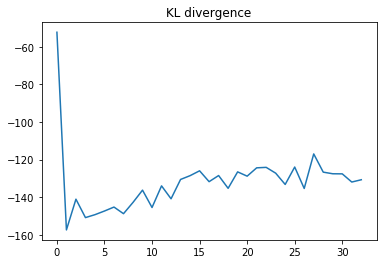

In [36]:
%matplotlib inline
y=optimizer.score_entropy
time=torch.arange(0,len(y),1.)
plt.title('KL divergence')
plt.plot(time, y)

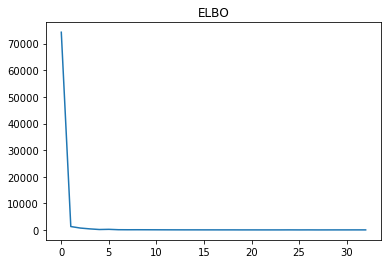

In [37]:
%matplotlib inline
y=torch.as_tensor(optimizer.score_elbo)
time=torch.arange(0,len(y),1.)
plt.title('ELBO')
plt.plot(time, y)


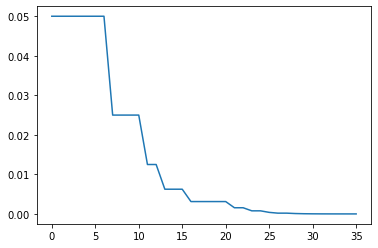

In [28]:
%matplotlib inline
y=optimizer.score_lr
time=torch.arange(0,len(y),1.)
plt.plot(time, y)


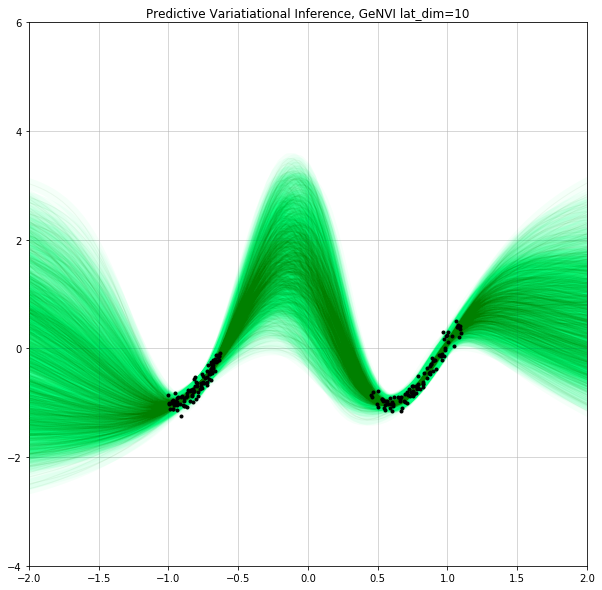

[tensor(14.6424, device='cuda:0'),
 tensor(-117.6823, device='cuda:0'),
 tensor(-66.5985, device='cuda:0')]

In [38]:
%matplotlib inline

def show(GeN,n):
    Z=GeN(n).detach()
    fig=setup.makePlot(Z,device)
    plt.title('Predictive Variatiational Inference, GeNVI lat_dim='+str(lat_dim))
    plt.show()
    return
    

show(GeN,1000)
scores

In [39]:
nLPP_train, nLPP_validation, nLPP_test, RSE_train, RSE_validation, RSE_test=setup.evaluate_metrics(GeN(1000).detach(),'cpu')

In [40]:
print('nLPP_valid: '+str(nLPP_validation))
print('SE_valid: '+str(RSE_validation))
print('nLPP_test: '+str(nLPP_test))
print('SE_test: '+str(RSE_test))

nLPP_valid: (tensor(-0.8750), tensor(0.6495))
SE_valid: (tensor(0.0101), tensor(0.0145))
nLPP_test: (tensor(0.2926), tensor(1.0928))
SE_test: (tensor(0.4023), tensor(0.6405))


Pour un choix de points $x_0,...,x_{n-1}$, on définit:
$$
d(\theta,\theta')=\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert
$$
ou
$$
d_2(\theta,\theta')=\biggl(\frac{1}{n}\sum_{i<n}\vert f_\theta(x_i)-f_{\theta'}(x_i)\vert^2\biggr)^{\frac{1}{2}}
$$


$P(f\in A)=P(\{\theta \mid f_\theta\in A\})$

$\theta \mapsto f_\theta$ (is it continuous?)

relation entre $d(\theta,\theta')$ et $d(f_\theta,f_\theta')$